In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gp
import plotly_express as px
import folium 

## Eample of a new geodataframe

In [2]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [3]:
df

,City,Country,Latitude,Longitude
0,Buenos Aires,Argentina,-34.58,-58.66
1,Brasilia,Brazil,-15.78,-47.91
2,Santiago,Chile,-33.45,-70.66
3,Bogota,Colombia,4.60,-74.08
4,Caracas,Venezuela,10.48,-66.86


In [4]:
gdf = gp.GeoDataFrame(df, geometry=gp.points_from_xy(df.Longitude, df.Latitude))

In [5]:
gdf

,City,Country,Latitude,Longitude,geometry
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86000 10.48000)


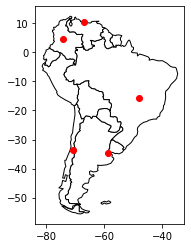

In [6]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [8]:
gdf.to_file("Maps2/SA_cities.shp")

In [10]:
path = gp.datasets.get_path('nybb')
df = gp.read_file(path)
df.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


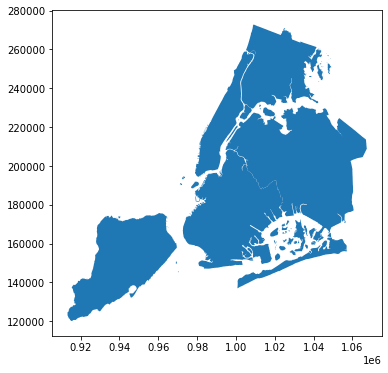

In [11]:
df.plot(figsize=(6, 6))
plt.show()

In [12]:
print(df.crs)


{'init': 'epsg:2263'}


In [13]:
df = df.to_crs(epsg=4326)
print(df.crs)
df.head()

{'init': 'epsg:4326', 'no_defs': True}


,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


In [14]:
m = folium.Map(location=[40.70, -73.94], zoom_start=10, tiles='CartoDB positron')
m

In [16]:
for _, r in df.iterrows():
    #without simplifying the representation of each borough, the map might not be displayed
    #sim_geo = gpd.GeoSeries(r['geometry'])
    sim_geo = gp.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['BoroName']).add_to(geo_j)
    geo_j.add_to(m)
m

In [17]:
city = ['Seattle','San Francisco','Los Angeles']
totaldays = [306,314,275]
poordays = [14,22,119]
aqimed = [42,45,81]
zone = ['west','west','west']
lon = [-122.33,-122.60,-118.23]
lat = [47.61,37.77,34.05]

In [18]:
aqistats = pd.DataFrame({'City':city, 'Total_Days':totaldays, 'Poor_Days':poordays, 'AQI_Median':aqimed,'Zone':zone, 'Lon':lon,'Lat':lat})

In [19]:
aqistats

,City,Total_Days,Poor_Days,AQI_Median,Zone,Lon,Lat
0,Seattle,306,14,42,west,-122.33,47.61
1,San Francisco,314,22,45,west,-122.60,37.77
2,Los Angeles,275,119,81,west,-118.23,34.05


In [21]:
gdf= gp.GeoDataFrame(aqistats, geometry = gp.points_from_xy(aqistats.Lon, aqistats.Lat))

In [22]:
gdf

,City,Total_Days,Poor_Days,AQI_Median,Zone,Lon,Lat,geometry
0,Seattle,306,14,42,west,-122.33,47.61,POINT (-122.33000 47.61000)
1,San Francisco,314,22,45,west,-122.60,37.77,POINT (-122.60000 37.77000)
2,Los Angeles,275,119,81,west,-118.23,34.05,POINT (-118.23000 34.05000)


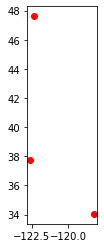

In [23]:
%matplotlib inline
gdf.plot(color='red')
plt.show()

In [24]:
locations =gdf[['Lat', 'Lon']]
locationlist = locations.values.tolist()
print(len(locationlist))
locationlist[0]

3


[47.61, -122.33]

In [25]:
locationlist

[[47.61, -122.33], [37.77, -122.6], [34.05, -118.23]]

In [31]:
for _, r in aqistats.iterrows():
    #without simplifying the representation of each borough, the map might not be displayed
    #sim_geo = gpd.GeoSeries(r['geometry'])
    sim_geo = gp.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['City']).add_to(geo_j)
    geo_j.add_to(m)

In [32]:
m = folium.Map(location=[35.70, -120.00], zoom_start=4, tiles='CartoDB positron')

In [33]:
m